In [13]:
import os
import sys
sys.path.insert(0, os.path.abspath('Fall 2019/Computation Phys Lab'))
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.sans-serif'] = 'stix'
from scipy import integrate
import AnimGIF as anim

In [14]:
def df_Nbody(v0, t, M, ϵ = 0.0005):
    Nbody = len(M)
    half = Nbody * 3
    end = Nbody * 6
    pos = v0[0:half]
    velo = v0[half:end]

    x = np.array(pos[0::3])
    y = np.array(pos[1::3])
    z = np.array(pos[2::3])
    vx = np.array(velo[0::3])
    vy = np.array(velo[1::3])
    vz = np.array(velo[2::3]) 
    
    Dx = np.subtract.outer(x,x)
    Dy = np.subtract.outer(y,y)
    Dz = np.subtract.outer(z,z)
    
    #acc = dv/dt    
    bracketx = Dx/((ϵ**2+Dx**2+Dy**2+Dz**2)**(3/2))
    accex = -np.dot(bracketx, M)
    
    brackety = Dy/((ϵ**2+Dx**2+Dy**2+Dz**2)**(3/2))
    accey = -np.dot(brackety, M)
    
    bracketz = Dz/((ϵ**2+Dx**2+Dy**2+Dz**2)**(3/2))
    accez = -np.dot(bracketz, M)    
    
    dpos = np.zeros(3*Nbody)
    dvelo = np.zeros(3*Nbody)
    dpos[0::3] = velo[0::3]               
    dpos[1::3] = velo[1::3]
    dpos[2::3] = velo[2::3]
    dvelo[0::3] = accex[0::1]
    dvelo[1::3] = accey[0::1]
    dvelo[2::3] = accez[0::1]

    return np.array([dpos,dvelo]).flatten()

In [15]:
# #initial conditions, in units where G=1
# G = 1 
# M1 = 1
# M2 = 2
# a = 1 

# #kepler's laws
# a1=a*M2/(M1+M2)
# a2=a*M1/(M1+M2)
# P=2.0*np.pi*np.sqrt(a**3/(G*(M1+M2)))
# v1=2.0*np.pi*a1/P
# v2=2.0*np.pi*a2/P


# body1Pos = [a1,0,0] #(x,y,z)
# body1Velo = [0,v1,0] #(vx,vy,vz)

# body2Pos = [-a2,0,0] #(x,y,z)
# body2Velo = [0,-v2,0] #(vx,vy,vz)



In [16]:
G = 1
P = 6.32449
p1 = 0.347111
p2 = 0.532728
M1 = 1
M2 = 1
M3 = 1

body1Pos = [-1,0,0]
body1Velo = [p1,p2,0]

body2Pos = [1,0,0]
body2Velo = [p1,p2,0]

body3Pos = [0,0,0]
body3Velo = [-2*p1,-2*p2,0]

In [17]:
tarr=np.linspace(0.0, P, 1000)
mass = np.array([M1,M2, M3])
pos = np.array([body1Pos, body2Pos, body3Pos]).flatten()
velo = np.array([body1Velo, body2Velo, body3Velo]).flatten()
v0 = np.array([pos, velo]).flatten()

In [18]:
result2=integrate.odeint(df_Nbody,v0,tarr,args=(mass,))
x1=result2[0:,0]
y1=result2[0:,1]
z1=result2[0:,2]

x2=result2[0:,3]
y2=result2[0:,4]
z2=result2[0:,5]

x3=result2[0:,6]
y3=result2[0:,7]
z3=result2[0:,8]

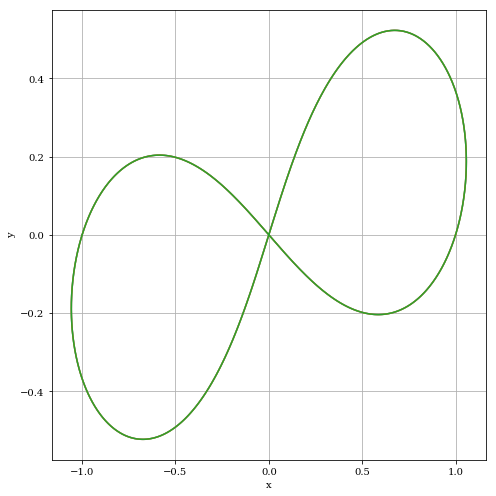

In [19]:
fig2, ax2 = plt.subplots(figsize=(7,7))
ax2.set_ylabel('y')
ax2.set_xlabel('x')
#ax.set_title()
ax2.plot(x1,y1)
ax2.plot(x2,y2)
ax2.plot(x3,y3)
#plt.legend()
plt.grid()
plt.show()